In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG16, VGG19
import numpy as np

In [2]:
img_width, img_height = 224, 224
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 3000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
vgg = VGG19(include_top=False, input_shape = input_shape, weights='imagenet')
vgg.summary()
for layer in vgg.layers:
    layer.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [4]:
#vgg = VGG19(include_top=False, input_shape = input_shape)
flat1 = Flatten()
class1 = Dense(1024, activation='relu')
output = Dense(5, activation='sigmoid')
model = Sequential([
    vgg,
    flat1,
    class1,
    output
])
model.summary()
'''
flat1 = Flatten()(np.array(model.outputs))
class1 = Dense(1024, activiation='relu')(flat1)
output = Dense(5, activation='softmax')(class1)

model = Model(inputs=model.inputs, outputs=output)
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 45,720,645
Trainable params: 25,696,261
Non-trainable params: 20,024,384
_________________________________________________________________


"\nflat1 = Flatten()(np.array(model.outputs))\nclass1 = Dense(1024, activiation='relu')(flat1)\noutput = Dense(5, activation='softmax')(class1)\n\nmodel = Model(inputs=model.inputs, outputs=output)\n"

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [6]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/50
187/187 [==============================] - 40s 212ms/step - loss: 0.7658 - acc: 0.9052 - val_loss: 0.1763 - val_acc: 0.9413
Epoch 2/50
187/187 [==============================] - 31s 164ms/step - loss: 0.1404 - acc: 0.9609 - val_loss: 0.0508 - val_acc: 0.9793
Epoch 3/50
187/187 [==============================] - 28s 147ms/step - loss: 0.0870 - acc: 0.9717 - val_loss: 0.0731 - val_acc: 0.9717
Epoch 4/50
187/187 [==============================] - 26s 140ms/step - loss: 0.0752 - acc: 0.9773 - val_loss: 0.0741 - val_acc: 0.9772
Epoch 5/50
187/187 [==============================] - 27s 143ms/step - loss: 0.0577 - acc: 0.9811 - val_loss: 0.0661 - val_acc: 0.9823
Epoch 6/50
187/187 [==============================] - 26s 140ms/step - loss: 0.0552 - acc: 0.9830 - val_loss: 0.0504 - val_acc: 0.9876
Epoch 7/50
187/187 [==============================] - 26s 139ms/step - loss: 0.0469 - acc: 0.9849 - val_loss: 0.0995 - val_acc: 0.9699
Epoch 8/50
187/187 [==============================] - 2

## Results
~98% accuracy, with a loss of about 0.01

That's pretty good! We could try to introduce drop out to see if that helps

In [7]:
model.save('vgg19_furniture_classifier.h5')

In [8]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def get_label_name(label_vals):
    label_num = np.argmax(label_vals)
    if label_num == 0:
        return "Bed"
    if label_num == 1:
        return "chair"
    if label_num == 2:
        return "sofa"
    if label_num == 3:
        return "swivelchair"
    if label_num == 4:
        return "table"

In [9]:
batch_holder = np.zeros((20, img_width, img_height, 3))
img_dir='data/test/'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(img_width,img_height))
  batch_holder[i, :] = img

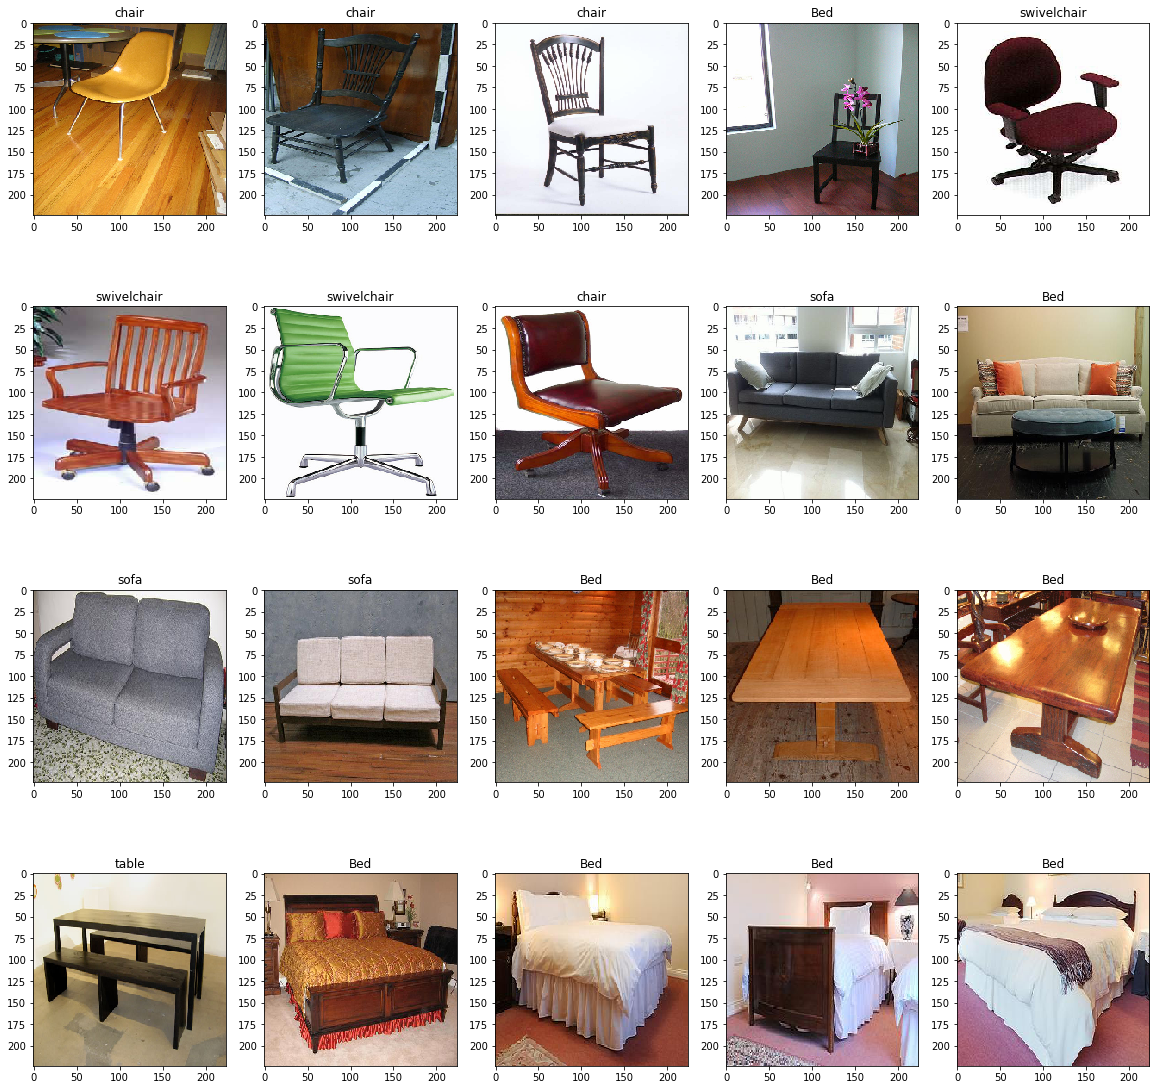

In [10]:
result=model.predict(batch_holder)
 
fig = plt.figure(figsize=(20, 20))
 
for i,img in enumerate(batch_holder):
  fig.add_subplot(4,5, i+1)
  plt.title(get_label_name(result[i]))
  plt.imshow(img/256.)
  
plt.show()

## Looks like there are still some mistakes with test data
Some of the mistakes are pretty close (chair instead of swivelchair) but some are not as close (bed instead of table)